<a href="https://colab.research.google.com/github/manishramamoorthy/Guvi-Task/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd

**Importing the dataset**

In [2]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data = data.drop_duplicates()

In [8]:
del data["User ID"]

In [15]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
data["Gender"] = data["Gender"].map({"Male":1,"Female":0})

**Splitting the dataset into the Training set and Test set**

In [17]:
X = data.drop(["Purchased"],axis=1)
y = data["Purchased"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
X_train

array([[ 0.97367959,  0.45543426, -0.13355362],
       [-1.0270319 ,  0.3571391 ,  0.3159537 ],
       [ 0.97367959, -0.52751739, -1.54200987],
       [ 0.97367959, -0.23263189, -0.58306093],
       [ 0.97367959, -0.23263189, -1.42214126],
       [-1.0270319 ,  0.84861492,  0.37588801],
       [ 0.97367959, -1.11728838, -1.12246971],
       [-1.0270319 ,  0.0622536 ,  1.30486979],
       [-1.0270319 ,  0.84861492,  0.13615077],
       [-1.0270319 , -0.92069805,  0.52572378],
       [-1.0270319 , -0.33092706,  0.07621646],
       [ 0.97367959, -0.92069805, -1.12246971],
       [-1.0270319 ,  0.0622536 ,  0.3159537 ],
       [ 0.97367959, -0.23263189,  0.28598654],
       [-1.0270319 ,  1.14350042,  2.14395011],
       [ 0.97367959, -0.62581255,  0.19608508],
       [-1.0270319 , -0.03604156, -0.37329085],
       [-1.0270319 , -1.9036497 ,  0.49575662],
       [ 0.97367959,  0.45543426, -0.46319232],
       [ 0.97367959, -0.23263189, -0.25342224],
       [ 0.97367959, -1.6087642 ,  0.555

In [23]:
y_train

332    0
220    0
74     0
89     0
199    0
      ..
257    0
87     0
328    1
303    1
338    0
Name: Purchased, Length: 300, dtype: int64

**Predicting the Test set results**

In [24]:
y_pred = DT.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

Accuracy_Score: 0.89
AUROC_Score: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


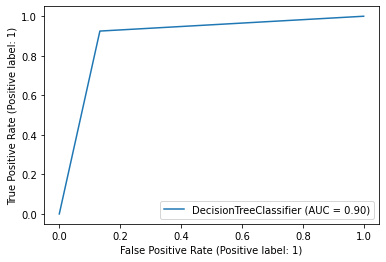

In [27]:
from sklearn.metrics import accuracy_score,roc_auc_score,plot_roc_curve
# Accuracy_Score
acc = accuracy_score(y_test,y_pred)
print("Accuracy_Score: {:.2f}".format(acc))
# AUROC Score
auc = roc_auc_score(y_test,y_pred)
print("AUROC_Score: {:.2f}".format(auc))
plot_roc_curve(DT,X_test,y_test)

In [29]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
118,0,0
221,1,1
369,1,1
244,0,0
273,1,1
...,...,...
248,0,0
340,1,1
241,0,0
102,0,0


**Making the Confusion Matrix**

In [31]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[52,  8],
       [ 3, 37]])

Text(51.0, 0.5, 'Actual')

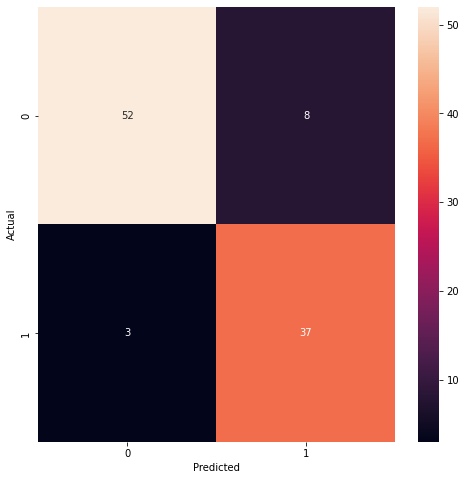

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(con_mat,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

**Visualising the Training set results**

In [36]:
from sklearn import tree

In [49]:
vis_tree_train = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=7)
vis_tree_train.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

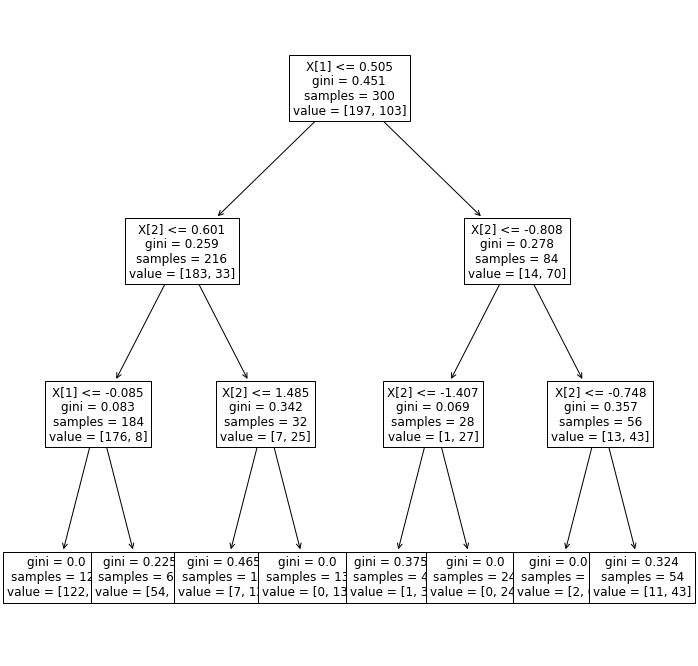

In [50]:
fig,ax = plt.subplots(figsize=(12,12))
tree.plot_tree(vis_tree_train,fontsize=12)
plt.show()

**Visualising the Test set results**

In [51]:
vis_tree_test = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=7)
vis_tree_test.fit(X_test,y_test)

DecisionTreeClassifier(max_depth=3, random_state=7)

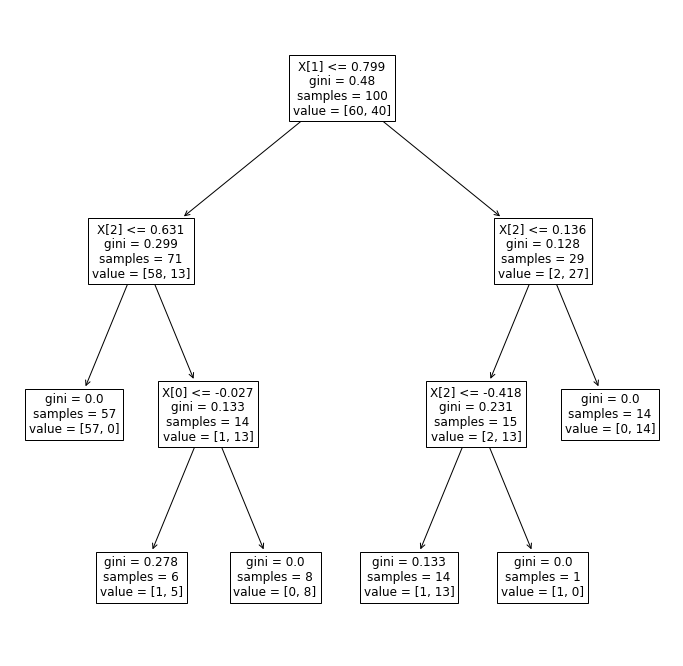

In [52]:
fig,ax = plt.subplots(figsize=(12,12))
tree.plot_tree(vis_tree_test,fontsize=12)
plt.show()